# IT Academy - Data Science amb Python
## Tasca 7: Estructura de control

###  [Github Registre de Logs](https://github.com/jesussantana/Registre_de_logs)

###  Exercici 1
- Normalitza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [1]:
import numpy as np
import pandas as pd
import requests
import re

pd.set_option('display.max_columns', None)

In [2]:
path = '../Data/Web_access_log-akumenius.com.txt'

Logs = pd.read_csv(path, sep='\s | \- | \"', names =['DNS','IP','Location','Date','Time','Request','Status','Size','Referer','UserAgent'], skiprows=260771, engine='python')

Logs_copy = Logs.copy()

Logs_copy

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:40:59 +0100],GET /libraries/jqueryui/js/jquery.ui.datepicke...,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN
1,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:41:01 +0100],GET /modules/raton/views/themes/bcoos/js/ga.js...,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN
2,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:40:58 +0100],GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN
3,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:41:00 +0100],GET /modules/raton/views/themes/bcoos/js/block...,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN
4,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:41:02 +0100],GET /includes/images/uploaded/logo.png HTTP/1....,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1097,www.akumenius.com 5.255.253.53,- [02/Mar/2014:03:05:39 +0100],"GET / HTTP/1.1"" 200 7528","-""",Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,NaN,NaN,NaN,NaN,NaN
1098,www.akumenius.com 74.86.158.107,- [02/Mar/2014:03:09:52 +0100],"HEAD / HTTP/1.1"" 200","""-""",Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,NaN,NaN,NaN,NaN,NaN
1099,localhost 127.0.0.1,- [02/Mar/2014:03:10:18 +0100],"OPTIONS * HTTP/1.0"" 200","""-""","Apache (internal dummy connection)"" VLOG=-",NaN,NaN,NaN,NaN,NaN
1100,localhost 127.0.0.1,- [02/Mar/2014:03:10:18 +0100],"OPTIONS * HTTP/1.0"" 200","""-""","Apache (internal dummy connection)"" VLOG=-",NaN,NaN,NaN,NaN,NaN


###  Exercici 2
- Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [3]:
Logs_copy.shape

(1102, 10)

In [4]:
Logs_copy.isnull().sum()

DNS             0
IP              0
Location        0
Date            0
Time            0
Request      1102
Status       1102
Size         1102
Referer      1102
UserAgent    1102
dtype: int64

In [5]:
Logs_copy.head()

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:40:59 +0100],GET /libraries/jqueryui/js/jquery.ui.datepicke...,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN
1,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:41:01 +0100],GET /modules/raton/views/themes/bcoos/js/ga.js...,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN
2,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:40:58 +0100],GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN
3,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:41:00 +0100],GET /modules/raton/views/themes/bcoos/js/block...,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN
4,www.akumenius.com 187.133.87.116,- [02/Mar/2014:00:41:02 +0100],GET /includes/images/uploaded/logo.png HTTP/1....,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,NaN,NaN,NaN,NaN,NaN


In [6]:
# Reorder columns of data

Logs_copy.UserAgent = Logs_copy.Time
Logs_copy.Request = Logs_copy.Location
Logs_copy.Referer = Logs_copy.Date
Logs_copy.Date = Logs_copy.IP
Logs_copy.Time = Logs_copy.IP = np.nan
Logs_copy.Location = ""

Logs_copy.head()

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com 187.133.87.116,NaN,,- [02/Mar/2014:00:40:59 +0100],NaN,GET /libraries/jqueryui/js/jquery.ui.datepicke...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
1,www.akumenius.com 187.133.87.116,NaN,,- [02/Mar/2014:00:41:01 +0100],NaN,GET /modules/raton/views/themes/bcoos/js/ga.js...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
2,www.akumenius.com 187.133.87.116,NaN,,- [02/Mar/2014:00:40:58 +0100],NaN,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
3,www.akumenius.com 187.133.87.116,NaN,,- [02/Mar/2014:00:41:00 +0100],NaN,GET /modules/raton/views/themes/bcoos/js/block...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
4,www.akumenius.com 187.133.87.116,NaN,,- [02/Mar/2014:00:41:02 +0100],NaN,GET /includes/images/uploaded/logo.png HTTP/1....,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...


In [7]:
# DNS & IP data split

Logs_copy[['DNS','IP']] = Logs_copy.DNS.str.split('\s', expand = True).get([0, 1])

In [8]:
Logs_copy.head()

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com,187.133.87.116,,- [02/Mar/2014:00:40:59 +0100],NaN,GET /libraries/jqueryui/js/jquery.ui.datepicke...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
1,www.akumenius.com,187.133.87.116,,- [02/Mar/2014:00:41:01 +0100],NaN,GET /modules/raton/views/themes/bcoos/js/ga.js...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
2,www.akumenius.com,187.133.87.116,,- [02/Mar/2014:00:40:58 +0100],NaN,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
3,www.akumenius.com,187.133.87.116,,- [02/Mar/2014:00:41:00 +0100],NaN,GET /modules/raton/views/themes/bcoos/js/block...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
4,www.akumenius.com,187.133.87.116,,- [02/Mar/2014:00:41:02 +0100],NaN,GET /includes/images/uploaded/logo.png HTTP/1....,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...


In [9]:
Logs_copy.DNS.unique()

array(['www.akumenius.com', 'localhost', 'akumenius.com',
       'test.akumenius.com', 'akumenius.es'], dtype=object)

In [10]:
# Time data extraction

Logs_copy.Time = Logs_copy.Date.str.extract(':(\d{2}:\d{2}:\d{2}.*)]')

In [11]:
# Date data extraction

Logs_copy.Date= Logs_copy.Date.str.extract('(\d+/\w+/\d+)')

In [12]:
Logs_copy.head()

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:59 +0100,GET /libraries/jqueryui/js/jquery.ui.datepicke...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
1,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:01 +0100,GET /modules/raton/views/themes/bcoos/js/ga.js...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
2,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:58 +0100,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
3,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:00 +0100,GET /modules/raton/views/themes/bcoos/js/block...,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
4,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:02 +0100,GET /includes/images/uploaded/logo.png HTTP/1....,NaN,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...


In [13]:
# Request & Status data split

Logs_copy[['Request','Status']] = Logs_copy.Request.str.split('\"', expand = True).get([0, 1])

In [14]:
Logs_copy.head()

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:59 +0100,GET /libraries/jqueryui/js/jquery.ui.datepicke...,200 36542,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
1,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:01 +0100,GET /modules/raton/views/themes/bcoos/js/ga.js...,200 419,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
2,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:58 +0100,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,200 72174,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
3,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:00 +0100,GET /modules/raton/views/themes/bcoos/js/block...,200 28568,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
4,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:02 +0100,GET /includes/images/uploaded/logo.png HTTP/1.1,200 11389,NaN,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...


In [15]:
# Size data extraction

Logs_copy.Size = Logs_copy.Status.str.extract('(\d+$)')
Logs_copy.head()

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:59 +0100,GET /libraries/jqueryui/js/jquery.ui.datepicke...,200 36542,36542,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
1,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:01 +0100,GET /modules/raton/views/themes/bcoos/js/ga.js...,200 419,419,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
2,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:58 +0100,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,200 72174,72174,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
3,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:00 +0100,GET /modules/raton/views/themes/bcoos/js/block...,200 28568,28568,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
4,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:02 +0100,GET /includes/images/uploaded/logo.png HTTP/1.1,200 11389,11389,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...


In [16]:
# Status data extraction

Logs_copy.Status = Logs_copy.Status.str.extract('(\d{3})')
Logs_copy.head()

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:59 +0100,GET /libraries/jqueryui/js/jquery.ui.datepicke...,200,36542,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
1,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:01 +0100,GET /modules/raton/views/themes/bcoos/js/ga.js...,200,419,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
2,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:58 +0100,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,200,72174,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
3,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:00 +0100,GET /modules/raton/views/themes/bcoos/js/block...,200,28568,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
4,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:02 +0100,GET /includes/images/uploaded/logo.png HTTP/1.1,200,11389,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...


In [17]:
# Referer useless data correction

for index, row in Logs_copy.iterrows(): 
    
    if row.Referer == '"-"' or row.Referer == '-"':
        row.Referer = ""
                
Logs_copy

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:59 +0100,GET /libraries/jqueryui/js/jquery.ui.datepicke...,200,36542,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
1,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:01 +0100,GET /modules/raton/views/themes/bcoos/js/ga.js...,200,419,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
2,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:40:58 +0100,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,200,72174,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
3,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:00 +0100,GET /modules/raton/views/themes/bcoos/js/block...,200,28568,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
4,www.akumenius.com,187.133.87.116,,02/Mar/2014,00:41:02 +0100,GET /includes/images/uploaded/logo.png HTTP/1.1,200,11389,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
...,...,...,...,...,...,...,...,...,...,...
1097,www.akumenius.com,5.255.253.53,,02/Mar/2014,03:05:39 +0100,GET / HTTP/1.1,200,7528,,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
1098,www.akumenius.com,74.86.158.107,,02/Mar/2014,03:09:52 +0100,HEAD / HTTP/1.1,200,200,,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
1099,localhost,127.0.0.1,,02/Mar/2014,03:10:18 +0100,OPTIONS * HTTP/1.0,200,200,,"Apache (internal dummy connection)"" VLOG=-"
1100,localhost,127.0.0.1,,02/Mar/2014,03:10:18 +0100,OPTIONS * HTTP/1.0,200,200,,"Apache (internal dummy connection)"" VLOG=-"


###  Exercici 3
- Geolocalitza les IP's. Aqui tens una pagina de interes:
  - [IP2Locattion](https://blog.ip2location.com/knowledge-base/how-to-add-a-sub-account-in-ip2location/)

In [18]:
import json
from ip2geotools.databases.noncommercial import DbIpCity

In [19]:
# Extract Ips

ips = Logs_copy.IP.unique()
ips

array(['187.133.87.116', '66.249.76.216', '217.12.28.5', '127.0.0.1',
       '74.86.158.107', '220.181.108.115', '157.56.93.103',
       '157.55.35.41', '212.231.208.21', '74.86.158.106', '123.125.71.31',
       '69.171.229.117', '69.171.229.119', '69.171.229.114',
       '69.171.229.118', '69.171.229.112', '173.252.77.116',
       '173.252.77.117', '173.252.77.118', '173.252.77.119',
       '173.252.77.113', '173.252.77.114', '176.31.255.177',
       '88.20.52.218', '199.30.20.35', '157.55.32.185', '181.164.57.183',
       '180.76.5.114', '217.12.28.130', '31.4.208.178', '87.217.147.158',
       '157.56.93.82', '201.31.227.195', '89.107.180.75', '157.55.34.176',
       '157.55.33.78', '199.30.20.66', '174.129.237.157', '123.125.71.17',
       '220.181.108.89', '201.134.106.130', '180.76.5.119',
       '180.76.6.155', '180.76.5.28', '202.46.58.28', '119.63.193.130',
       '180.76.6.132', '93.186.202.198', '180.76.5.95', '194.224.196.204',
       '83.63.131.193', '46.222.83.180', '79.1

In [20]:
# Function for extract Locations

localhost = "127.0.0.1"

def extract_location(ip):
    
    try:
        if ip == localhost:
            return ('Local', 'Local')

        else:
            response = DbIpCity.get(ip, api_key = 'free').to_json()    
            data = json.loads(response)
            return data['city'], data['country']
    
    except:
        return np.nan

In [21]:
# Extract Location Test

extract_location(Logs_copy.IP[50])

('Alcobendas', 'ES')

In [22]:
# List of locations for unique Ips

locations = []

for element in ips:
    
    locations.append(extract_location(element))  

locations

[('Miguel Auza', 'MX'),
 ('Mountain View', 'US'),
 ('Seville', 'ES'),
 ('Local', 'Local'),
 ('Chicago', 'US'),
 ('Beijing', 'CN'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Alcobendas', 'ES'),
 ('Chicago', 'US'),
 ('Haidian (Haidian Qu)', 'CN'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Roubaix', 'FR'),
 ('Madrid', 'ES'),
 ('Ashburn', 'US'),
 ('Newark', 'US'),
 ('Palermo', 'AR'),
 ('Beijing', 'CN'),
 ('Seville', 'ES'),
 ('Madrid', 'ES'),
 ('Pozuelo de Alarcón', 'ES'),
 ('Newark', 'US'),
 ('São Paulo', 'BR'),
 ('Tres Cantos', 'ES'),
 ('Newark', 'US'),
 ('Newark', 'US'),
 ('Ashburn', 'US'),
 ('Ashburn', 'US'),
 ('Haidian (Haidian Qu)', 'CN'),
 ('Beijing', 'CN'),
 ('Querétaro City (Industria del Hierro)', 'MX'),
 ('Beijing', 'CN'),
 ('Beijing', 'CN'),
 ('Beijing', 'CN'),
 ('Shenzhen (Luohu Qu)', 'CN'),
 ('Minato-ku', 'JP')

In [23]:
# Compare ips & add location

for index, row in Logs_copy.iterrows():
    
    # iterate the two lists
    for a, b in zip(ips, locations):
        
        # Compare & add
        if row.IP == a:
            row.Location = b

In [24]:
Logs_copy

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent
0,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:40:59 +0100,GET /libraries/jqueryui/js/jquery.ui.datepicke...,200,36542,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
1,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:41:01 +0100,GET /modules/raton/views/themes/bcoos/js/ga.js...,200,419,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
2,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:40:58 +0100,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,200,72174,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
3,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:41:00 +0100,GET /modules/raton/views/themes/bcoos/js/block...,200,28568,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
4,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:41:02 +0100,GET /includes/images/uploaded/logo.png HTTP/1.1,200,11389,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...
...,...,...,...,...,...,...,...,...,...,...
1097,www.akumenius.com,5.255.253.53,"(Moscow (Tsentralnyy administrativnyy okrug), RU)",02/Mar/2014,03:05:39 +0100,GET / HTTP/1.1,200,7528,,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
1098,www.akumenius.com,74.86.158.107,"(Chicago, US)",02/Mar/2014,03:09:52 +0100,HEAD / HTTP/1.1,200,200,,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
1099,localhost,127.0.0.1,"(Local, Local)",02/Mar/2014,03:10:18 +0100,OPTIONS * HTTP/1.0,200,200,,"Apache (internal dummy connection)"" VLOG=-"
1100,localhost,127.0.0.1,"(Local, Local)",02/Mar/2014,03:10:18 +0100,OPTIONS * HTTP/1.0,200,200,,"Apache (internal dummy connection)"" VLOG=-"


In [25]:
# Extract UserAgent Data

from device_detector import SoftwareDetector

Devices = Logs_copy['UserAgent']

device = []

for x in Devices:
    device.append(SoftwareDetector(x).parse())

client_name = []
client_type = []
client_version = []
os_name = []
os_version = []
device_type = []

for x in device:
    client_name.append(x.client_name())
    client_type.append(x.client_type())
    client_version.append(x.client_version())
    os_name.append(x.os_name())
    os_version.append(x.os_version())
    device_type.append(x.device_type())

Logs_copy['Client Name'] = client_name
Logs_copy['Client Type'] = client_type
Logs_copy['Client Version'] = client_version
Logs_copy['Os Name'] = os_name
Logs_copy['Os Version'] = os_version
Logs_copy['Device Type'] = device_type

Logs_copy.head()

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,UserAgent,Client Name,Client Type,Client Version,Os Name,Os Version,Device Type
0,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:40:59 +0100,GET /libraries/jqueryui/js/jquery.ui.datepicke...,200,36542,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,Android Browser,browser,,Android,4.0.4,
1,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:41:01 +0100,GET /modules/raton/views/themes/bcoos/js/ga.js...,200,419,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,Android Browser,browser,,Android,4.0.4,
2,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:40:58 +0100,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,200,72174,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,Android Browser,browser,,Android,4.0.4,
3,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:41:00 +0100,GET /modules/raton/views/themes/bcoos/js/block...,200,28568,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,Android Browser,browser,,Android,4.0.4,
4,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:41:02 +0100,GET /includes/images/uploaded/logo.png HTTP/1.1,200,11389,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; S...,Android Browser,browser,,Android,4.0.4,


In [26]:
Logs_copy.UserAgent[0]

'Mozilla/5.0 (Linux; U; Android 4.0.4; es-mx; SonyEricssonST15i Build/4.1.B.0.587) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30" VLOG=-'

In [27]:
del(Logs_copy['UserAgent'])

Logs_copy.head()

,DNS,IP,Location,Date,Time,Request,Status,Size,Referer,Client Name,Client Type,Client Version,Os Name,Os Version,Device Type
0,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:40:59 +0100,GET /libraries/jqueryui/js/jquery.ui.datepicke...,200,36542,http://www.akumenius.com/hoteles-baratos/hotel...,Android Browser,browser,,Android,4.0.4,
1,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:41:01 +0100,GET /modules/raton/views/themes/bcoos/js/ga.js...,200,419,http://www.akumenius.com/hoteles-baratos/hotel...,Android Browser,browser,,Android,4.0.4,
2,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:40:58 +0100,GET /libraries/jquery/jquery-1.4.2.min.js HTTP...,200,72174,http://www.akumenius.com/hoteles-baratos/hotel...,Android Browser,browser,,Android,4.0.4,
3,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:41:00 +0100,GET /modules/raton/views/themes/bcoos/js/block...,200,28568,http://www.akumenius.com/hoteles-baratos/hotel...,Android Browser,browser,,Android,4.0.4,
4,www.akumenius.com,187.133.87.116,"(Miguel Auza, MX)",02/Mar/2014,00:41:02 +0100,GET /includes/images/uploaded/logo.png HTTP/1.1,200,11389,http://www.akumenius.com/hoteles-baratos/hotel...,Android Browser,browser,,Android,4.0.4,


###  Exercici 4
- Mostreu-me la teva creativitat, Sorprèn-me fes un pas més enllà amb el analysis anterior.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

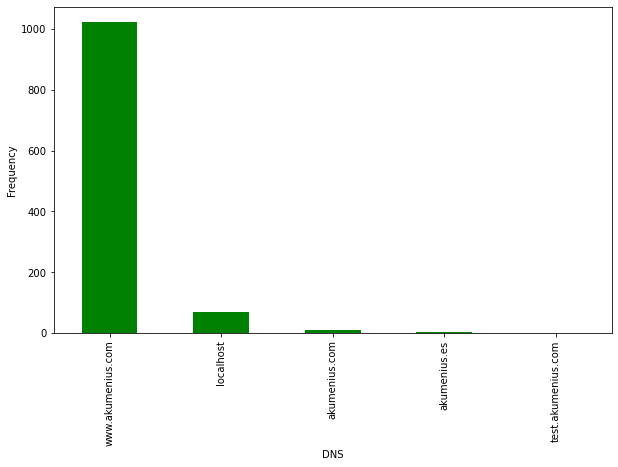

In [29]:
graph = Logs_copy[['DNS', 'Date']].groupby(['DNS']).count().sort_values(by = 'Date',ascending = False)
graph = graph.rename(columns = {'Date' : 'Frequency'})
graph.plot.bar(y = 'Frequency', color = 'green', ylabel = 'Frequency', legend = None, figsize = (10,6))
plt.show()

<AxesSubplot:ylabel='DNS'>

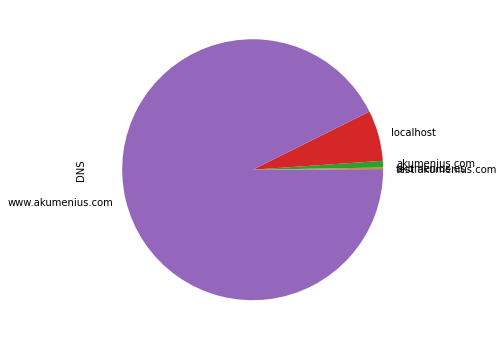

In [30]:
Logs_copy.DNS.value_counts(ascending = True).plot(kind = 'pie', figsize = (10,6))

<AxesSubplot:>

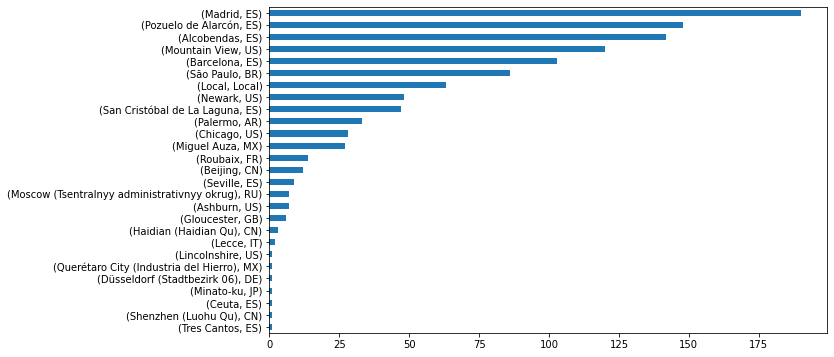

In [31]:
Logs_copy.Location.value_counts(ascending = True).plot(kind = 'barh', figsize = (10,6))

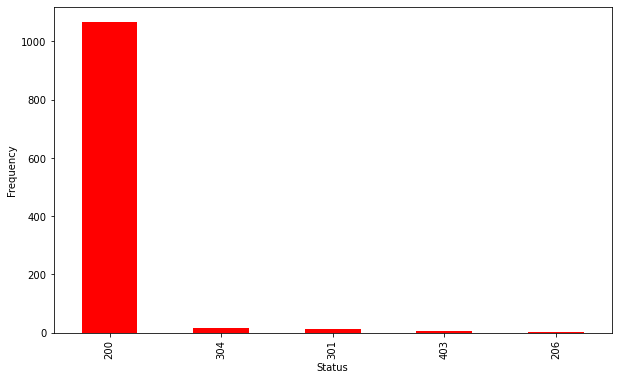

In [32]:
graph = Logs_copy[['Status', 'Date']].groupby(['Status']).count().sort_values(by = 'Date',ascending = False)
graph = graph.rename(columns = {'Date' : 'Frequency'})
graph.plot.bar(y = 'Frequency', color = 'red', ylabel = 'Frequency', legend = None, figsize = (10,6))
plt.show()

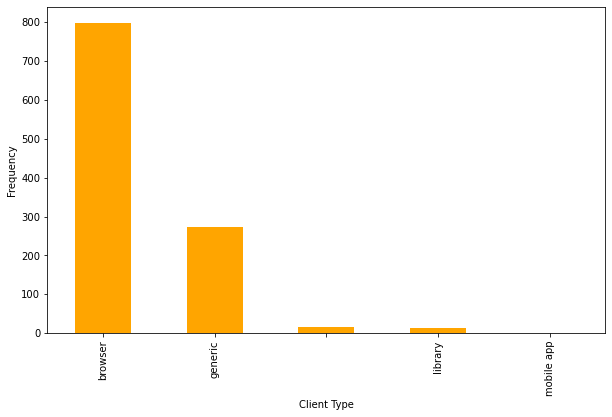

In [33]:
graph = Logs_copy[['Client Type','Date']].groupby(['Client Type']).count().sort_values(by = 'Date',ascending = False)
graph = graph.rename(columns = {'Date' : 'Frequency'})
graph.plot.bar(y = 'Frequency', color = 'orange', ylabel = 'Frequency', legend = None, figsize = (10,6))
plt.show()

In [34]:
Logs_export = Logs_copy.copy()

Logs_export.replace('', 'null', inplace = True)

Logs_export.to_csv('../Data/Logs_export.csv', index = False)